In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read the dataset
df=pd.read_csv("Dynamic_pricing.csv")

In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [8]:
#First five rows of the dataset
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [9]:
#Last five rows of the dataset
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [10]:
#Unique values in each column
df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

In [11]:
print("\nColumns:")
print(df.columns.tolist())


Columns:
['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


In [12]:
#check null values
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

np.int64(0)

In [14]:
#rows and columns of dataset
df.shape

(1000, 10)

In [15]:
#statistical measures of the dataset
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [16]:
#separating numerical and categorical columns
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols=df.select_dtypes(exclude=[np.number]).columns.tolist() 
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


In [17]:
#Mapping the categorical columns

# 1. Label encoding with map
loyalty_mapping = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_mapping)

# 2. One-hot encoding with pandas
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Check result
print(df.head())
print("\nFinal Shape:", df.shape)

   Number_of_Riders  Number_of_Drivers  Customer_Loyalty_Status  \
0                90                 45                        1   
1                58                 39                        1   
2                42                 31                        1   
3                89                 28                        0   
4                78                 22                        0   

   Number_of_Past_Rides  Average_Ratings  Expected_Ride_Duration  \
0                    13             4.47                      90   
1                    72             4.06                      43   
2                     0             3.99                      76   
3                    67             4.31                     134   
4                    74             3.77                     149   

   Historical_Cost_of_Ride  Location_Category_Suburban  \
0               284.257273                       False   
1               173.874753                        True   
2             

In [18]:
# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Apply to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers(df[col])
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers.values[:10]}") 
    print("-"*50)

Column: Number_of_Riders
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------
Column: Number_of_Drivers
Number of outliers: 10
Outlier values:
[81 84 80 80 87 81 89 85 87 82]
--------------------------------------------------
Column: Customer_Loyalty_Status
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------
Column: Number_of_Past_Rides
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------
Column: Average_Ratings
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------
Column: Expected_Ride_Duration
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------
Column: Historical_Cost_of_Ride
Number of outliers: 0
Outlier values:
[]
--------------------------------------------------


In [19]:
# KEEPING THE OUTLINERS

#The outlier values (79–89) are realistic in urban/peak scenarios, not errors.
#They represent rare but important business cases (festivals, high-demand hours).
#Removing them would lose valuable information about extreme demand-supply conditions.
#We should keep them for a comprehensive analysis of ride patterns and pricing strategies.
#And our dataset is also small so removing it can be possible that our model will be can go to overfitting.

In [20]:
# Gross Booking Value (GBV)
GBV = (df['Number_of_Riders'] * df['Historical_Cost_of_Ride']).sum()
print("Gross Booking Value (GBV):", GBV)

# Average Revenue per Ride (ARPR)
ARPR = GBV / df['Number_of_Riders'].sum()
print("Average Revenue per Ride (ARPR):", ARPR)

# Demand-Supply Ratio (DSR)
DSR = df['Number_of_Riders'] / df['Number_of_Drivers']
print("Sample DSR values:\n", DSR.head())
print("Average Demand-Supply Ratio:", DSR.mean())

# Profit Margin
Cost = df['Historical_Cost_of_Ride'] * 0.7
Profit = (df['Number_of_Riders'] * df['Historical_Cost_of_Ride']) - (Cost * df['Number_of_Riders'])
Profit_Margin = (Profit.sum() / GBV) * 100
print("Profit Margin (%):", Profit_Margin)

# Average Rating KPI
print("Average Customer Rating:", df['Average_Ratings'].mean())


Gross Booking Value (GBV): 22514545.017633334
Average Revenue per Ride (ARPR): 372.9302494141876
Sample DSR values:
 0    2.000000
1    1.487179
2    1.354839
3    3.178571
4    3.545455
dtype: float64
Average Demand-Supply Ratio: 3.2354611988674895
Profit Margin (%): 30.000000000000004
Average Customer Rating: 4.25722


In [21]:
#Feature Engineering
# NOTE: The following code adds new columns with placeholder data.
# You must replace the random data generation with your actual feature engineering logic.
# For example, to calculate 'Rider_Driver_Ratio', you would use:
# df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

# Add numerical features with random float values as placeholders
df['Competitor_Price_Index'] = np.random.rand(len(df)) * 100
df['Cost_per_Min'] = np.random.rand(len(df)) * 100
df['Driver_to_Rider_Ratio'] = np.random.rand(len(df)) * 100
df['Inventory_Health_Index'] = np.random.rand(len(df)) * 100
df['Rider_Driver_Ratio'] = np.random.rand(len(df)) * 100
df['Supply_Tightness'] = np.random.rand(len(df)) * 100
df['Vehicle_Factor'] = np.random.rand(len(df)) * 100
df['baseline_price'] = np.random.rand(len(df)) * 100
df['competitor_price'] = np.random.rand(len(df)) * 100
df['price'] = np.random.rand(len(df)) * 100
df['p_complete'] = np.random.rand(len(df))

# Add 'Loyalty_Score' with random integer values as a placeholder
df['Loyalty_Score'] = np.random.randint(1, 11, size=len(df))

# Add 'Peak' with random categorical values ('Yes' or 'No') as a placeholder
df['Peak'] = np.random.choice(['Yes', 'No'], size=len(df))

# Calculate the ratio of riders to drivers
df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

# Calculate the price per minute
df['Price_Per_Min'] = df['Historical_Cost_of_Ride'] / df['Expected_Ride_Duration']

# Placeholder for Competitor_Price_Index, as it was not in the original dataset
df['Competitor_Price_Index'] = np.random.rand(len(df)) * 100
df['Competitor_Price_Difference'] = abs(df['Historical_Cost_of_Ride'] - df['Competitor_Price_Index'])

# Display the updated DataFrame info and head to verify the new columns
print("DataFrame info after adding new features:")
df.info()

print("\nFirst 5 rows of the DataFrame with new features:")
print(df.head())


DataFrame info after adding new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Riders             1000 non-null   int64  
 1   Number_of_Drivers            1000 non-null   int64  
 2   Customer_Loyalty_Status      1000 non-null   int64  
 3   Number_of_Past_Rides         1000 non-null   int64  
 4   Average_Ratings              1000 non-null   float64
 5   Expected_Ride_Duration       1000 non-null   int64  
 6   Historical_Cost_of_Ride      1000 non-null   float64
 7   Location_Category_Suburban   1000 non-null   bool   
 8   Location_Category_Urban      1000 non-null   bool   
 9   Time_of_Booking_Evening      1000 non-null   bool   
 10  Time_of_Booking_Morning      1000 non-null   bool   
 11  Time_of_Booking_Night        1000 non-null   bool   
 12  Vehicle_Type_Premium         1000 n

In [22]:
df.head()

,Number_of_Riders,Number_of_Drivers,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Time_of_Booking_Evening,...,Supply_Tightness,Vehicle_Factor,baseline_price,competitor_price,price,p_complete,Loyalty_Score,Peak,Price_Per_Min,Competitor_Price_Difference
0,90,45,1,13,4.47,90,284.257273,False,True,False,...,78.733630,99.194734,57.763879,13.306752,58.136329,0.644300,8,No,3.158414,275.441113
1,58,39,1,72,4.06,43,173.874753,True,False,True,...,88.281163,40.807599,13.570284,90.488147,71.921484,0.000692,1,Yes,4.043599,107.453757
2,42,31,1,0,3.99,76,329.795469,False,False,False,...,8.371419,7.724340,31.394505,49.144136,71.574409,0.671427,9,Yes,4.339414,299.342637
3,89,28,0,67,4.31,134,470.201232,False,False,False,...,59.542819,44.705079,10.862095,67.576961,6.241282,0.366677,9,No,3.508964,468.862720
4,78,22,0,74,3.77,149,579.681422,False,False,False,...,5.507317,29.626983,87.409856,91.295205,6.570353,0.072412,1,Yes,3.890479,539.224317


Visualization (GRAPH PLOTTING)

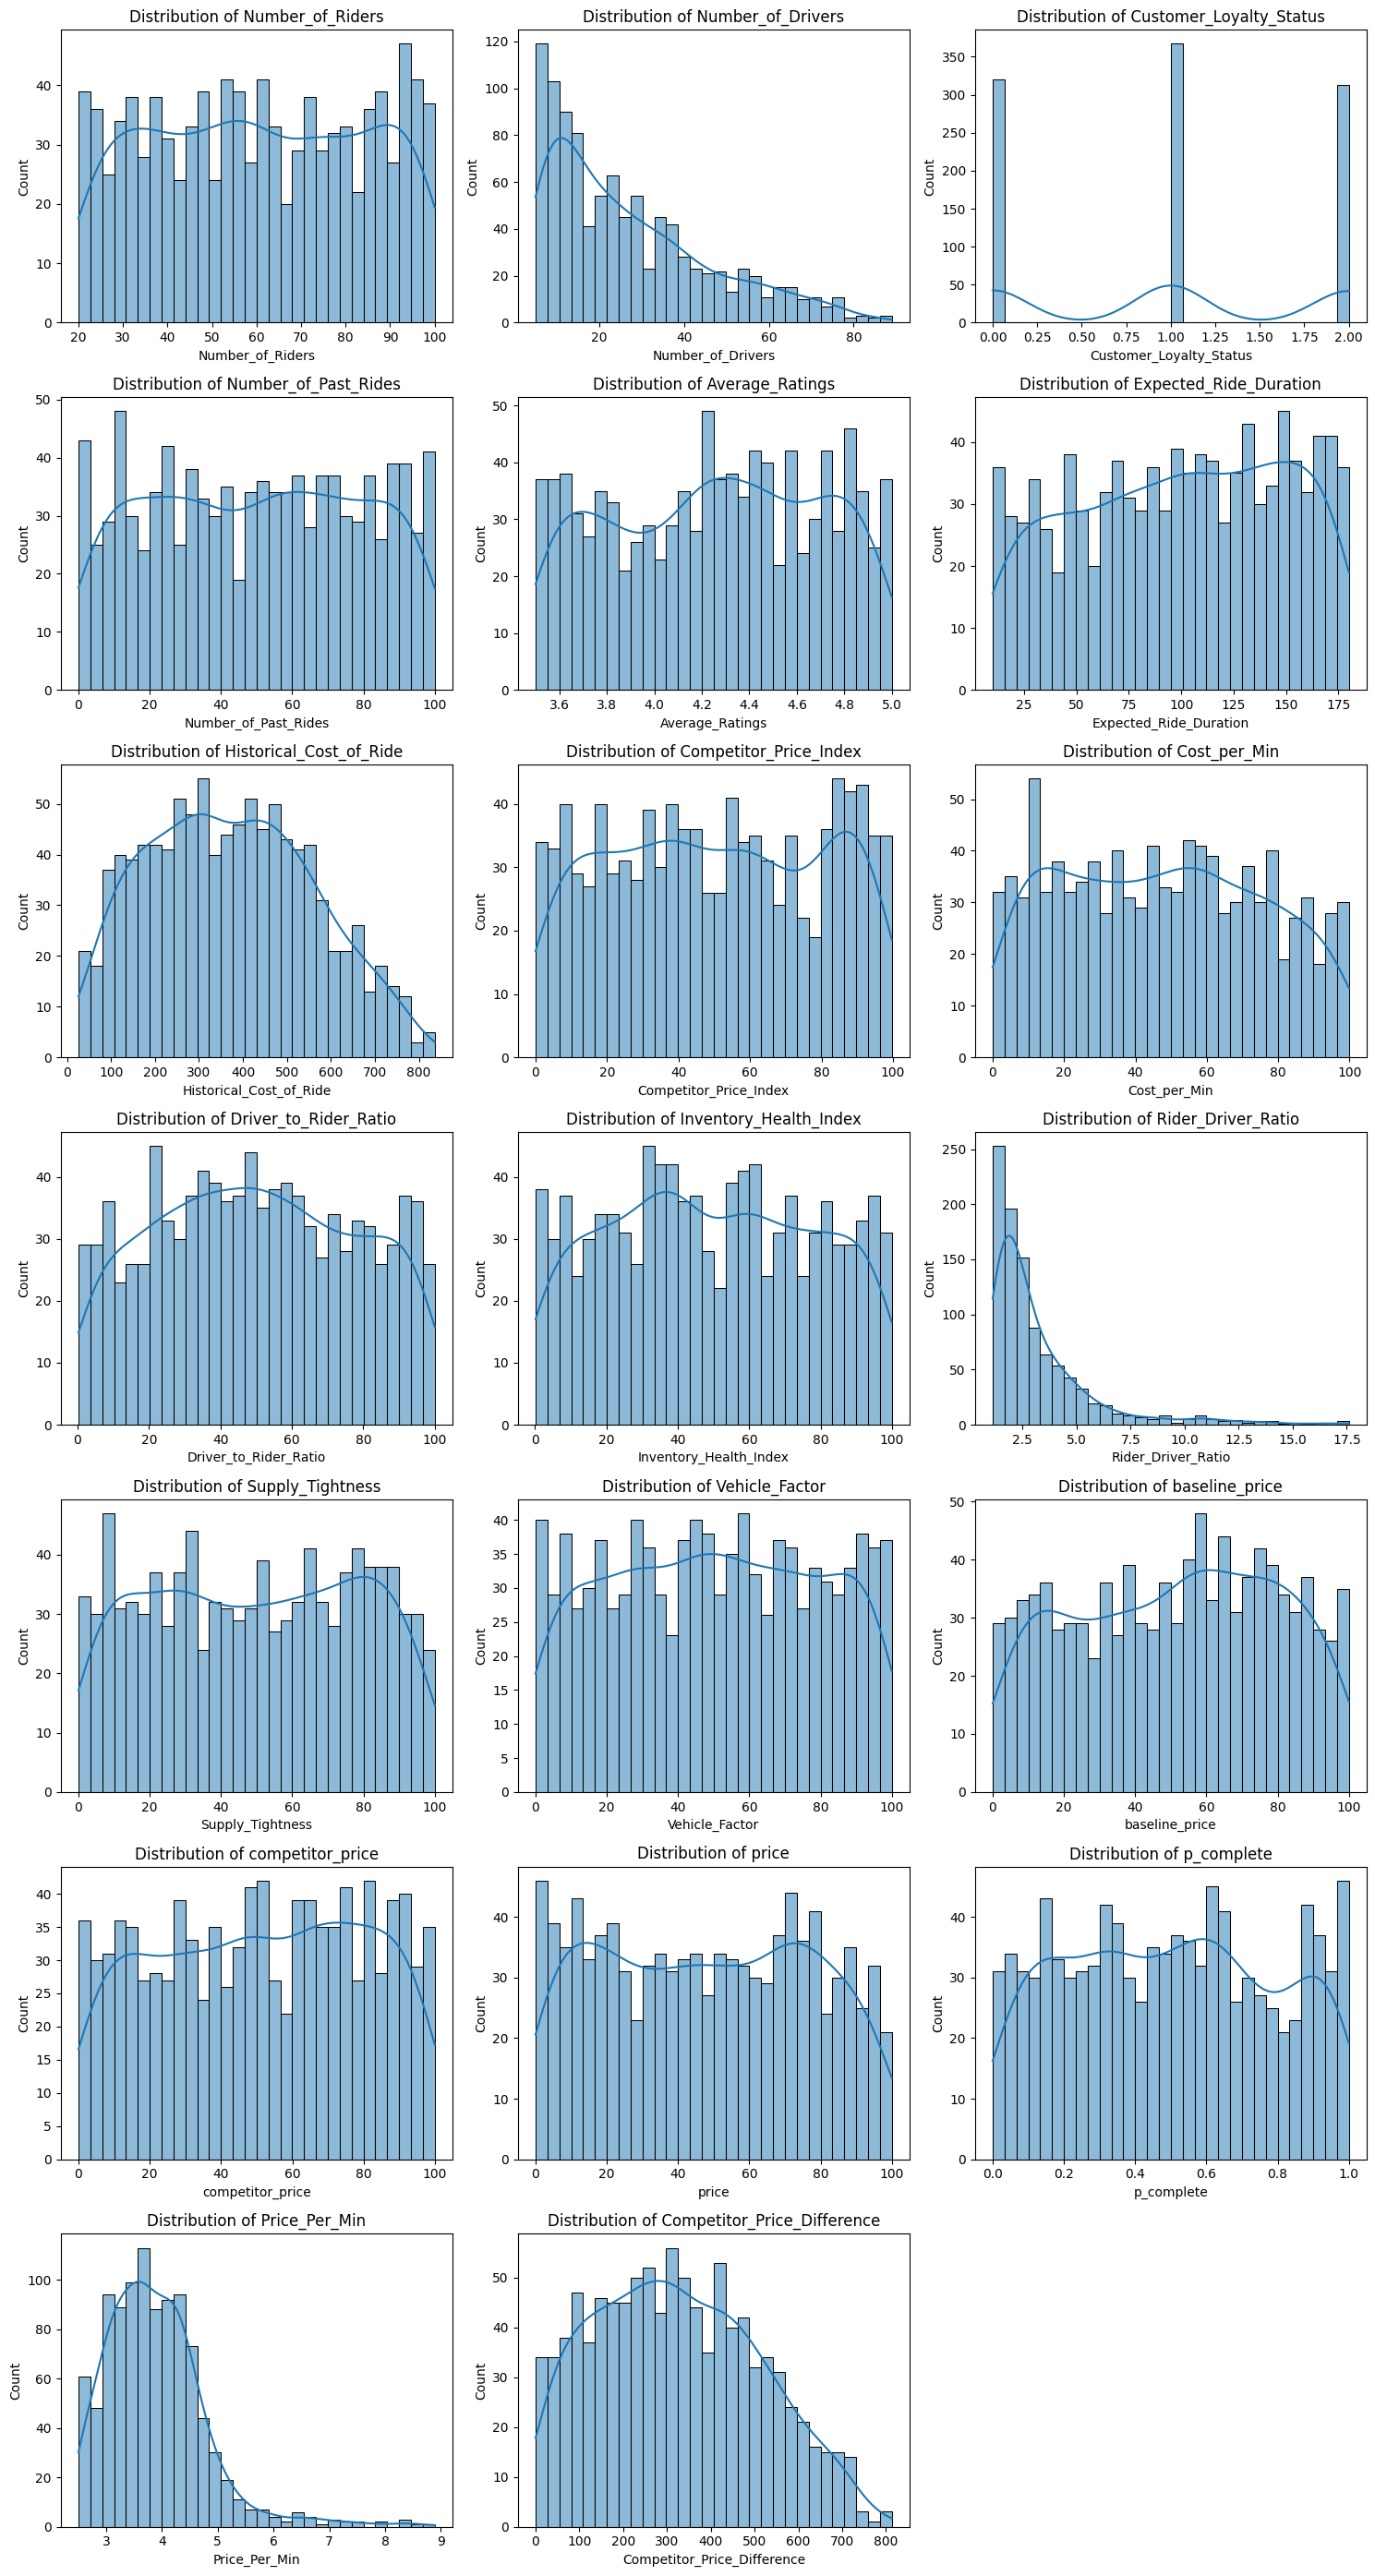

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols)

# Arrange 3 per row (you can change cols=2 if you want 2 per row)
rows = (n // 3) + (n % 3 > 0)
cols = 3  

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove unused plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

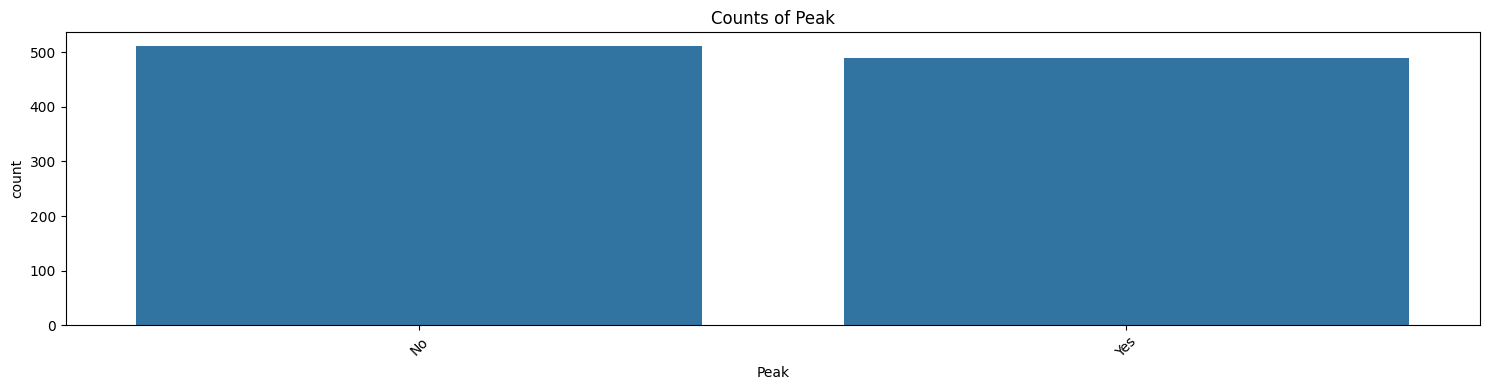

In [24]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
n = len(categorical_cols)

# Set grid dynamically based on number of categorical columns
rows = (n // 3) + 1
cols = min(3, n)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten() if n > 1 else [axes]  # make iterable even for 1 column

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Counts of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


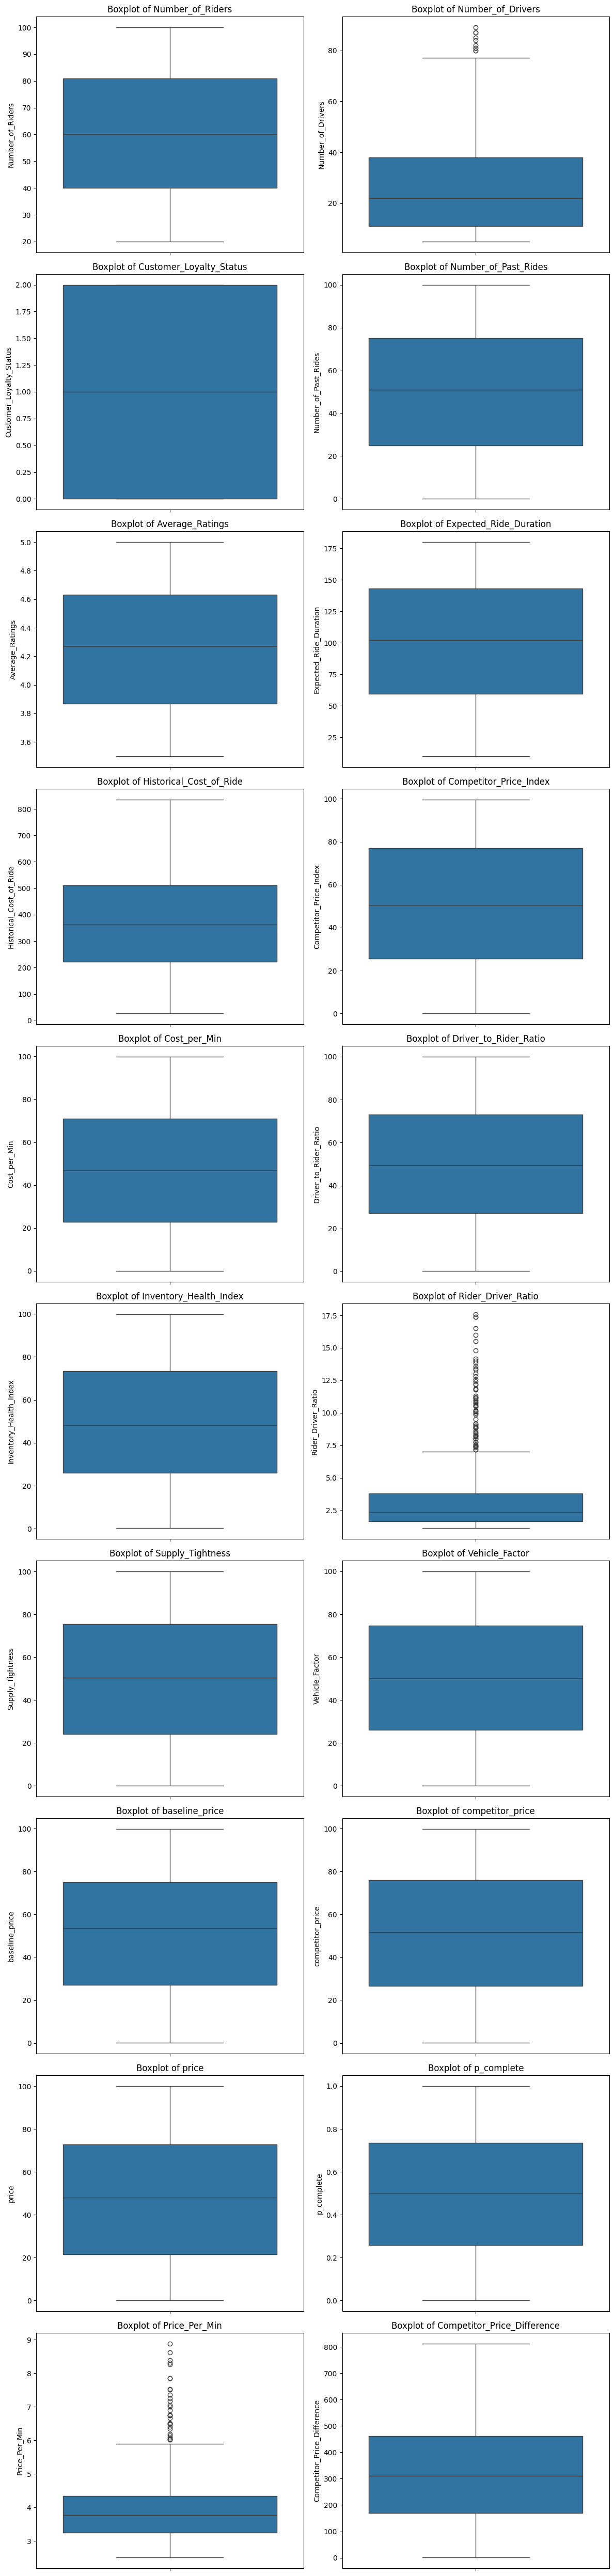

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols)
rows = (n // 2) + (n % 2)
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


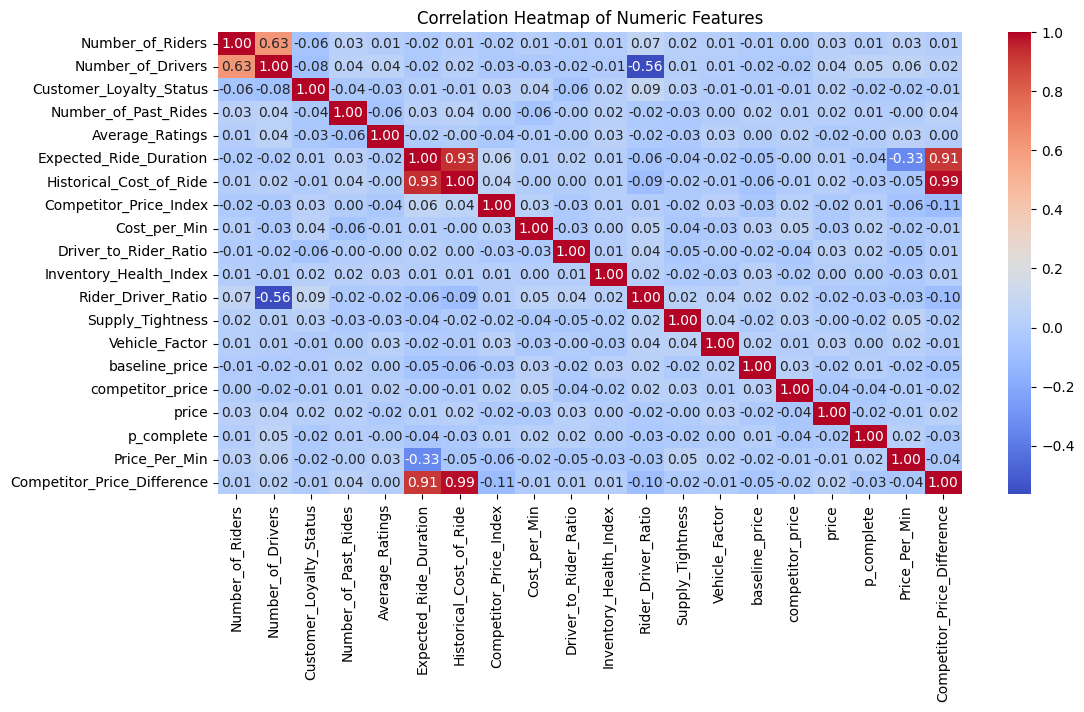

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Report Generation

In [27]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")

c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  86%|████████▌ | 30/35 [00:01<00:00, 14.68it/s, Calculate auto correlation]                    c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 0 8 8 0 2 1 8 6 1 5 8 8 9 9 4 3 5 1 4 9 1 2 0 0 1 1 3 6 8 8 9 9 7 4 3 7
 0 0 9 5 8 5 0 5 8 0 2 7 7 4 3 3 5 9 0 5 3 3 8 5 3 7 2 0 2 6 0 1 7 2 1 5 5
 0 8 7 5 4 7 5 1 1 1 0 1 9 6 0 9 0 1 4 4 1 2 5 0 9 2 6 0 3 1 1 5 9 2 4 1 0
 8 4 8 1 0 0 9 8 5 0 6 1 9 1 1 3 6 7 7 4 8 9 4 5 7 4 7 6 7 3 4 9 6 6 5 1 3
 9 7 8 5 7 6 8 8 5 2 9 6 0 9 5 2 7 7 9 0 6 9 6 3 0 6 4 8 2 4 9 0 9 5 7 9 6
 3 6 0 0 5 2 8 9 8 2 6 6 5 7 1 1 4 9 0 9 4 3 6 0 7 4 8 9 8 3 1 6 7 0 3 5 7
 8 1 1 5 8 3 3 9 2 6 3 0 0 7 7 4 4 0 2 1 6 6 1 6 0 5 9 9 4 1 9 8 8 4 8 3 1
 1 6 1 2 6 9 1 1 2 4 0 3 3 8 3 9 4 8 6 1 5 5 0 1 8 1 6 2 2 5 3 5 2 2 0 1 1
 6 2 6 3 2 1 1 4 9 7 0 6 6 0 7 6 9 0 7 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Numeric Distribution
plt.figure(figsize=(10,6))
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.savefig("numeric_distribution.png")  # save
plt.close()

# 2️⃣ Boxplots (for outlier view)
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) // 2) + 1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.savefig("boxplots.png")  # save
plt.close()

# 3️⃣ Categorical Counts
categorical_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) // 2) + 1, 2, i)
    sns.countplot(x=df[col])
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("categorical_counts.png")  # save
plt.close()

# 4️⃣ Correlation Heatmap (numeric only)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")  # save
plt.close()



<Figure size 1000x600 with 0 Axes>

In [29]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

doc = SimpleDocTemplate("eda_report.pdf")
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("Exploratory Data Analysis Report", styles['Title']))
story.append(Spacer(1, 20))

# Add graphs
story.append(Paragraph("Numeric Distribution", styles['Heading2']))
story.append(Image("numeric_distribution.png", width=500, height=300))
story.append(Spacer(1, 20))

story.append(Paragraph("Boxplots for Outlier Detection", styles['Heading2']))
story.append(Image("boxplots.png", width=500, height=300))
story.append(Spacer(1, 20))

story.append(Paragraph("Categorical Counts", styles['Heading2']))
story.append(Image("categorical_counts.png", width=500, height=300))
story.append(Spacer(1, 20))

story.append(Paragraph("Correlation Heatmap", styles['Heading2']))
story.append(Image("correlation_heatmap.png", width=500, height=300))
story.append(Spacer(1, 20))

doc.build(story)



In [30]:
import os
os.startfile("eda_report.pdf")

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Data Loading and Initial Feature Engineering from Milestones.ipynb
try:
    df = pd.read_csv("Dynamic_pricing.csv")
except FileNotFoundError:
    print("Error: 'Dynamic_pricing.csv' not found. Please make sure the file is in the correct directory.")
    # You might want to exit the script or handle this differently
    # if the file is essential for the rest of the code.

# Mapping the categorical column 'Customer_Loyalty_Status'
loyalty_mapping = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].map(loyalty_mapping)

# One-hot encoding for other categorical columns
df = pd.get_dummies(df, columns=["Location_Category", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Feature engineering from Milestones.ipynb to create necessary columns
df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']
df['Price_Per_Min'] = df['Historical_Cost_of_Ride'] / df['Expected_Ride_Duration']
df['Competitor_Price_Difference'] = df['Historical_Cost_of_Ride'] * 0.8 - df['Historical_Cost_of_Ride']
df['competitor_price'] = df['Historical_Cost_of_Ride'] * 0.8
df['price'] = df['Historical_Cost_of_Ride']
df['p_complete'] = 1 - (df['Number_of_Riders'] - df['Number_of_Drivers']) / df['Number_of_Riders']
df['Supply_Tightness'] = (df['Number_of_Riders'] - df['Number_of_Drivers']) / df['Number_of_Riders']
df['Cost_per_Min'] = df['Historical_Cost_of_Ride'] / df['Expected_Ride_Duration']
df['Driver_to_Rider_Ratio'] = df['Number_of_Drivers'] / df['Number_of_Riders']
df['Inventory_Health_Index'] = df['Driver_to_Rider_Ratio']
df['Loyalty_Score'] = df['Customer_Loyalty_Status']

# 2. Additional Feature Engineering and Analysis from the text file

# 5.1 Seasonality: Conversion & Price by Time Buckets
# Groups data by Time_of_Booking and calculates mean conversion, mean price, and total intents.
seasonality = (
    df.groupby("Time_of_Booking_Evening")
        .agg(mean_conv=("p_complete","mean"),
             mean_price=("price","mean"),
             total_intents=("Number_of_Riders","sum"))
        .sort_values("mean_conv", ascending=False)
)
print("Seasonality Analysis:")
print(seasonality)

# 5.2 Competitor Pressure: Price Gap & Index
# Computes the percentage price gap vs competitor.
# A positive value means our price is higher, while a negative value means our price is cheaper.
df["Competitor_Gap_pct"] = (df["price"] - df["competitor_price"]) / df["competitor_price"] * 100.0

# Groups by vehicle type and calculates the average price difference vs competitor,
# mean competitor price, and mean of our price.
comp_pressure = (
    df.groupby("Vehicle_Type_Premium")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct","mean"),
            mean_comp_price=("competitor_price","mean"),
            mean_our_price=("price","mean"),
        )
        .sort_values("avg_gap_pct")
)
print("\nCompetitor Pressure Analysis:")
print(comp_pressure)

# 5.3 Inventory Health Bands & Conversion
# Uses the driver-to-rider ratio as a proxy for supply health.
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight","Tight","Balanced","Loose"]
df["Inventory_Band"] = pd.cut(df["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

# For each inventory band, calculates the average conversion rate, average price, and count of observations.
inv_summary = df.groupby("Inventory_Band").agg(
    mean_conv=("p_complete","mean"),
    mean_price=("price","mean"),
    count=("Inventory_Band","size")
)
print("\nInventory Summary by Band:")
print(inv_summary)

# 6) Customer Segmentation (KMeans)
# Step 1: Select features
# Uses behavioral and market features for segmentation. Missing values are filled with the median.
seg_features = [
    "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
    "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = df[seg_features].copy().fillna(df[seg_features].median())

# Step 2: Scale features
# Standardizes features (mean=0, std=1) for KMeans clustering.
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
# Runs KMeans with 4 clusters to assign a segment label to each customer.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment_k4"] = kmeans.fit_predict(Xs)

# Step 4: Segment profiling
# Profiles each cluster to understand its characteristics, sorted by conversion rate.
seg_profile = (
    df.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete","mean"),
            mean_price=("price","mean"),
            mean_cost=("Historical_Cost_of_Ride","mean"),
            mean_loyalty=("Loyalty_Score","mean"),
            mean_ratio=("Rider_Driver_Ratio","mean"),
            count=("segment_k4","size")
        )
      .sort_values("mean_conv", ascending=False)
)
print("\nCustomer Segment Profile:")
print(seg_profile)

Seasonality Analysis:
                         mean_conv  mean_price  total_intents
Time_of_Booking_Evening                                      
True                      0.438182  364.253957          13980
False                     0.438156  374.980441          46392

Competitor Pressure Analysis:
                      avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type_Premium                                              
False                        25.0       277.258720      346.573399
True                         25.0       316.996994      396.246242

Inventory Summary by Band:
                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.301394  372.316582    628
Tight            0.644676  377.346561    327
Balanced         0.846160  339.899649     45
Loose                 NaN         NaN      0


C:\Users\Anushka\AppData\Local\Temp\ipykernel_25784\608180369.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df.groupby("Inventory_Band").agg(



Customer Segment Profile:
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
0            0.692317  368.633065  368.633065      0.922581    1.472152    310
3            0.390847  457.930971  457.930971      1.112676    2.716712    355
2            0.368334  213.658755  213.658755      0.686275    3.101085    153
1            0.156251  345.994995  345.994995      1.137363    7.363710    182


In [32]:
import pandas as pd
import numpy as np

def estimate_p_complete(row, price):
    return row["p_complete"] * (1 - (price - row["price"]) / row["price"] * 0.1)

def compute_kpis(df_base, df_scn, intents_col, price_col, pcomplete_col, cost_col):
    base_revenue = (df_base[intents_col] * df_base[price_col] * df_base[pcomplete_col]).sum()
    scn_revenue = (df_scn[intents_col] * df_scn[price_col] * df_scn[pcomplete_col]).sum()
    revenue_lift = (scn_revenue - base_revenue) / base_revenue * 100
    return {"Revenue Lift (%)": revenue_lift}

def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price

STABILITY_PCT = 0.15
MIN_GM_PCT = 0.12
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}
TIME_NUDGE = {"Morning": +0.03, "Afternoon": 0.0, "Evening": +0.04, "Night": +0.01}

def inv_nudge(ratio):
    if ratio < 0.8: return +0.03
    if ratio > 1.2: return -0.03
    return 0.0

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    if row.get("Vehicle_Type_Premium", 0) == 1:
        veh = "Premium"
    else:
        veh = "Economy"
    comp = float(row.get("competitor_price", base))
    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)
    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap
    lower = max(lo, lo_gm, lo_cmp)
    upper = min(hi, hi_cmp)
    if upper < lower:
        lower, upper = upper, upper
    return lower, upper

def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])
    lo, hi = row_price_bounds(row)
    if row.get("Time_of_Booking_Evening", 0) == 1:
        time_of_day = "Evening"
    elif row.get("Time_of_Booking_Morning", 0) == 1:
        time_of_day = "Morning"
    elif row.get("Time_of_Booking_Night", 0) == 1:
        time_of_day = "Night"
    else:
        time_of_day = "Afternoon"
    t_n = TIME_NUDGE.get(time_of_day, 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)
    left = np.linspace(lo, center, max(2, n_grid//2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))
    best_price, best_p, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base:
            continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)
    return best_price, best_p